In [2]:
# Imports
import os, sys

sys.path.append('/home/izabel/Documentos/env_tcc/lib/python3.6/site-packages')

import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os

# Current working directory
cwd = os.getcwd()

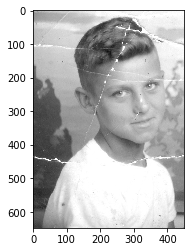

In [3]:
# Define o caminho e inicializa a imagem

img_path = cwd + '/testimages/'
mask_path = cwd + '/masks/'
inpaint_path = cwd + '/inpaints/'

mask_filename = mask_path + 'mask_'
opencv_inpaint_filename = inpaint_path + 'inpaint_opencv_'
generative_inpaint_filename = inpaint_path + 'inpaint_generative_'

source = 'img_2.jpg'

image = Image.open(img_path + source)
image = np.asarray(image)

plt.imshow(image)

In [5]:
# Create HSV and grayscale formats
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define variables used in masking
max_gray = np.amax(gray)
min_color = np.array([0,0,max_gray-60])
max_color = np.array([255,60,max_gray])

# Create initial region mask
reg = cv2.inRange(hsv, min_color, max_color)

# plt.imshow(gray, cmap="gray")

# Blur the image for better line detection
blur = cv2.GaussianBlur(gray,(3, 3),0)

# Define morphologial transformation kernel
kernel = np.ones((3,3),np.uint8)

# Create edges and dilate to get better results
edges = cv2.Canny(gray, 100, 150)
edges = cv2.dilate(edges, kernel)

# plt.imshow(edges, cmap="gray")

# Intersect region and edges
mask = reg & edges
mask = cv2.dilate(mask, kernel)

# Save mask
cv2.imwrite(mask_filename + source, mask)

# plt.imshow(mask, cmap="gray")

True

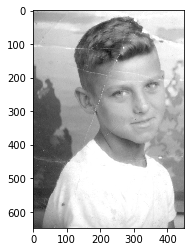

In [6]:
inpaint = cv2.inpaint(image,mask,3,cv2.INPAINT_TELEA)
save = cv2.cvtColor(inpaint, cv2.COLOR_BGR2RGB)

# Save inpaint 
cv2.imwrite(opencv_inpaint_filename + source, save)

plt.imshow(inpaint)

In [ ]:
plt.imshow(image)